# Netflix Borsa Verisi ile Regresyon Alıştırması

* Verileri " https://www.kaggle.com/sr123sud12345/netflix-stock-price-data " adresinden temin ettim.
* Verileri Colab üzerinden yüklemek için ilk kod satırı kullanıldı.

In [3]:
from google.colab import files
upload=files.upload()

Saving NFLX.csv to NFLX.csv


## Veriyi Keşfetmek

In [7]:
import pandas as pd
import numpy as np

data=pd.read_csv('NFLX.csv')
print(data.head(-5))

           Date        Open        High  ...       Close   Adj Close     Volume
0    2003-12-29    4.045714    4.127857  ...    3.916429    3.916429   67032000
1    2004-01-05    3.892857    4.578571  ...    4.428571    4.428571  216480600
2    2004-01-12    4.445714    4.725000  ...    4.682857    4.682857  122980200
3    2004-01-19    4.698571    5.657143  ...    5.535714    5.535714  302667400
4    2004-01-26    5.464286    5.681428  ...    5.243571    5.243571  239968400
..          ...         ...         ...  ...         ...         ...        ...
774  2018-10-29  305.260010  321.880005  ...  309.100006  309.100006   94270900
775  2018-11-05  311.100006  332.049988  ...  303.470001  303.470001   57826400
776  2018-11-12  300.000000  303.549988  ...  286.209991  286.209991   59077200
777  2018-11-19  283.790009  285.089996  ...  258.820007  258.820007   45955700
778  2018-11-26  260.549988  290.809998  ...  286.130005  286.130005   65741000

[779 rows x 7 columns]


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,784.000000,784.000000,784.000000,784.000000,784.000000,7.840000e+02
mean,56.553771,59.041555,54.259276,56.837583,56.837583,9.240542e+07
std,85.207863,88.807998,81.631715,85.435852,85.435852,8.090067e+07
min,1.321429,1.357143,1.272857,1.290000,1.290000,1.085070e+07
25%,4.067858,4.248928,3.886250,4.116071,4.116071,4.001638e+07
50%,15.468572,16.740000,14.223571,15.636429,15.636429,6.355160e+07
75%,68.314287,69.717501,67.179283,68.349642,68.349642,1.209644e+08
max,415.950012,423.209991,395.079987,411.089996,411.089996,7.136955e+08


In [79]:
#'pearson', 'spearman', 'kendall'

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v  

print(data.corr(method=histogram_intersection))


             Open    High     Low   Close  Adj Close  Volume
Open          1.0 44338.2 42539.3 43416.2    43416.2 44338.2
High      44338.2     1.0 42539.3 44560.7    44560.7 46288.6
Low       42539.3 42539.3     1.0 42539.3    42539.3 42539.3
Close     43416.2 44560.7 42539.3     1.0    44560.7 44560.7
Adj Close 43416.2 44560.7 42539.3 44560.7        1.0 44560.7
Volume    44338.2 46288.6 42539.3 44560.7    44560.7     1.0


In [84]:
print(data.corr(method='pearson'),'\n')
print(data.corr(method='spearman'),'\n')
print(data.corr(method='kendall'))

           Open  High  Low  Close  Adj Close  Volume
Open        1.0   1.0  1.0    1.0        1.0    -0.2
High        1.0   1.0  1.0    1.0        1.0    -0.2
Low         1.0   1.0  1.0    1.0        1.0    -0.2
Close       1.0   1.0  1.0    1.0        1.0    -0.2
Adj Close   1.0   1.0  1.0    1.0        1.0    -0.2
Volume     -0.2  -0.2 -0.2   -0.2       -0.2     1.0 

           Open  High  Low  Close  Adj Close  Volume
Open        1.0   1.0  1.0    1.0        1.0     0.1
High        1.0   1.0  1.0    1.0        1.0     0.1
Low         1.0   1.0  1.0    1.0        1.0     0.1
Close       1.0   1.0  1.0    1.0        1.0     0.1
Adj Close   1.0   1.0  1.0    1.0        1.0     0.1
Volume      0.1   0.1  0.1    0.1        0.1     1.0 

           Open  High  Low  Close  Adj Close  Volume
Open        1.0   1.0  1.0    1.0        1.0     0.0
High        1.0   1.0  1.0    1.0        1.0     0.0
Low         1.0   1.0  1.0    1.0        1.0     0.0
Close       1.0   1.0  1.0    1.0        1

## Model Oluşturmak

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [16]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Model Oluşturuldu...")

Defined create_model and train_model


## Değişkenleri Belirleme

In [0]:
learning_rate = 0.05
epochs = 300
batch_size = 50000

x_1=data.iloc[:,2].values
x=data.iloc[:,3].values  
y=data.iloc[:,1].values

## Modelin Eğitimi

In [121]:
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, x,y,epochs, batch_size)

print("\nThe learned weight: %.4f" % weight)
print("The learned bias: %.4f\n" % bias )



Epoch 1/300
25/25 [==============================] - 0s 1ms/step - loss: 19131.5391 - root_mean_squared_error: 139.4585
Epoch 2/300
25/25 [==============================] - 0s 969us/step - loss: 2736.3740 - root_mean_squared_error: 52.7378
Epoch 3/300
25/25 [==============================] - 0s 963us/step - loss: 68.5875 - root_mean_squared_error: 8.3497
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 21.2392 - root_mean_squared_error: 4.6119
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 23.0317 - root_mean_squared_error: 4.8374
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 27.7797 - root_mean_squared_error: 5.3093
Epoch 7/300
25/25 [==============================] - 0s 935us/step - loss: 26.3899 - root_mean_squared_error: 5.1781
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 24.3992 - root_mean_squared_error: 4.9621
Epoch 9/300
25/25 [==============================] - 0s 1ms/step -

## Modelin Görselleştirme Fonksiyonlarını Oluşturma

In [122]:
def plot_the_model(weight, bias, feature, label):
  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  plt.scatter(feature, label)

  x0 = 0
  y0 = bias
  x1 = feature[-1]
  y1 = bias + (weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Model Özeti ve Görselleştirme

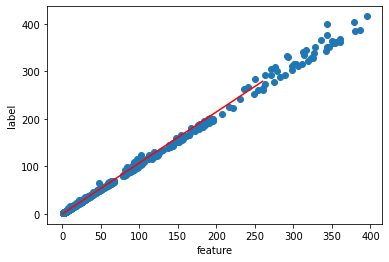

In [123]:
plot_the_model(weight,bias, x, y)


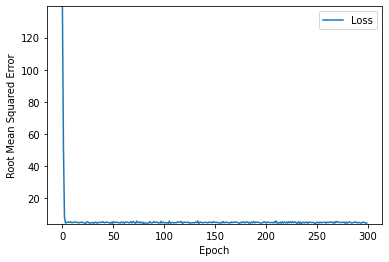

In [124]:
plot_the_loss_curve(epochs, rmse)

## Farklı Parametrelerle Deneme

In [0]:
learning_rate = 0.5
epochs = 300
batch_size = 50000

In [126]:
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, x,y,epochs, batch_size)

print("\nThe learned weight: %.4f" % weight)
print("The learned bias: %.4f\n" % bias )

Epoch 1/300
25/25 [==============================] - 0s 1ms/step - loss: 1081.5820 - root_mean_squared_error: 33.2207
Epoch 2/300
25/25 [==============================] - 0s 976us/step - loss: 893.5945 - root_mean_squared_error: 30.1866
Epoch 3/300
25/25 [==============================] - 0s 960us/step - loss: 261.8683 - root_mean_squared_error: 16.2695
Epoch 4/300
25/25 [==============================] - 0s 936us/step - loss: 750.7428 - root_mean_squared_error: 27.6665
Epoch 5/300
25/25 [==============================] - 0s 930us/step - loss: 741.2991 - root_mean_squared_error: 27.4907
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 521.1929 - root_mean_squared_error: 23.0609
Epoch 7/300
25/25 [==============================] - 0s 1ms/step - loss: 567.5347 - root_mean_squared_error: 24.0515
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 585.8599 - root_mean_squared_error: 24.3478
Epoch 9/300
25/25 [==============================] - 0s

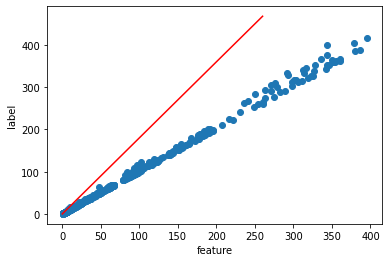

In [127]:
plot_the_model(weight,bias, x, y)

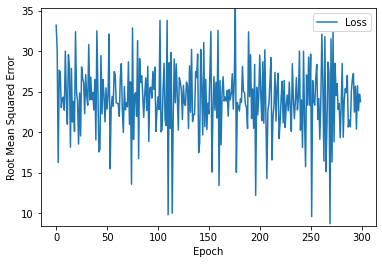

In [128]:
plot_the_loss_curve(epochs, rmse)